In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

In [2]:
data=pd.read_csv('./New_Clean.csv')

In [3]:
def cyclical_encoding(hour):
    # Encode hour using sine and cosine functions
    hour_sin = np.sin(2 * np.pi * hour / 24)
    hour_cos = np.cos(2 * np.pi * hour / 24)
    return hour_sin, hour_cos

# Apply cyclical encoding to 'departure_hour' and 'arrival_hour' columns
data['departure_hour_sin'], data['departure_hour_cos'] = zip(*data['departure_hour'].apply(cyclical_encoding))
data['arrival_hour_sin'], data['arrival_hour_cos'] = zip(*data['arrival_hour'].apply(cyclical_encoding))


In [4]:
data = data.drop_duplicates()

In [5]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos'],
      dtype='object')

In [6]:
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create an OrdinalEncoder object with specified categories
encoder = OrdinalEncoder(categories=[days_of_week_order])

# Encode the 'day_of_week' column
data['day_of_week'] = encoder.fit_transform(data[['day_of_week']]).astype(int)

# Create a dictionary to store the mapping of original days to encoded integers
days_mapping = dict(zip(days_of_week_order, range(len(days_of_week_order))))

# Display the mapping
print("Encoding Mapping:")
print(days_mapping)

Encoding Mapping:
{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


In [7]:
encoder = OrdinalEncoder()

# Fit and transform the 'airline' column
encoded_values = encoder.fit_transform(data[['airline']]).astype(int)

# Store the encoded values back into the 'airline' column in the DataFrame
data['airline'] = encoded_values

# Get the unique airlines in the original data
unique_airlines = encoder.categories_[0]

# Create a dictionary to store the mapping of original airlines to encoded integers
airline_mapping = dict(zip(unique_airlines, range(len(unique_airlines))))

# Display the mapping
print("Encoding Mapping for Airline:")
print(airline_mapping)

Encoding Mapping for Airline:
{'Air India': 0, 'AirAsia': 1, 'GO FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'StarAir': 5, 'Trujet': 6, 'Vistara': 7}


In [8]:
print(data['source_city'].unique())

['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


In [9]:
print(data['destination_city'].unique())

['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


In [10]:
unique_cities = sorted(set(data['source_city'].unique()) | set(data['destination_city'].unique()))

# Create an OrdinalEncoder object
encoder = OrdinalEncoder(categories=[unique_cities, unique_cities])

# Fit and transform both 'source_city' and 'destination_city' columns together
encoded_values = encoder.fit_transform(data[['source_city', 'destination_city']]).astype(int)

# Replace the original 'source_city' and 'destination_city' columns with the encoded values
data['source_city'] = encoded_values[:, 0]
data['destination_city'] = encoded_values[:, 1]

# Get the unique cities in the original data
unique_cities = sorted(unique_cities)

# Create a dictionary to store the mapping of original cities to encoded integers
encoding_mapping_cities = dict(zip(unique_cities, range(len(unique_cities))))

# Display the mapping
print("\nEncoding Mapping for Cities:")
print(encoding_mapping_cities)


Encoding Mapping for Cities:
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}


In [11]:
encoder = OrdinalEncoder()

# Fit and transform the 'class' column
encoded_values = encoder.fit_transform(data[['class']]).astype(int)

# Store the encoded values back into the 'class' column in the DataFrame
data['class'] = encoded_values

# Get the unique classes in the original data
unique_classes = encoder.categories_[0]

# Create a dictionary to store the mapping of original classes to encoded integers
class_mapping = dict(zip(unique_classes, range(len(unique_classes))))

# Display the mapping
print("Encoding Mapping for Class:")
print(class_mapping)

Encoding Mapping for Class:
{'business': 0, 'economy': 1}


In [12]:
# Define the order of categories
categories_order = [ 'Early Morning', 'Morning', 'Evening','Afternoon', 'Night', 'Late Night']

# Assuming 'data' is your DataFrame with the specified columns

# Combine the unique values of both 'departure_category' and 'arrival_category' to get all unique categories
unique_categories = sorted(set(data['departure_category'].unique()) | set(data['arrival_category'].unique()))

# Create an OrdinalEncoder object with the specified categories
encoder = OrdinalEncoder(categories=[categories_order, categories_order])

# Fit and transform both 'departure_category' and 'arrival_category' columns together
encoded_values = encoder.fit_transform(data[['departure_category', 'arrival_category']]).astype(int)

# Replace the original 'departure_category' and 'arrival_category' columns with the encoded values
data['departure_category'] = encoded_values[:, 0]
data['arrival_category'] = encoded_values[:, 1]

# Create a dictionary to store the mapping of original categories to encoded integers
mapping_categories = dict(zip(categories_order, range(len(categories_order))))

# Display the mapping
print("\nEncoding Mapping for Categories:")
print(mapping_categories)


Encoding Mapping for Categories:
{'Early Morning': 0, 'Morning': 1, 'Evening': 2, 'Afternoon': 3, 'Night': 4, 'Late Night': 5}


In [13]:
data.head(1)

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos
0,4,4,2,18,2,0,21,4,5,1,130,1,5953,-1.0,-1.836970e-16,-0.707107,0.707107


In [14]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'day_of_week':
[4 5 6 0 1 2 3]

Unique values in column 'airline':
[4 1 7 2 3 0 6 5]

Unique values in column 'source_city':
[2 5 0 4 3 1]

Unique values in column 'departure_hour':
[18  6  4 10  8 11  9 14 15  7 12 19  5 17 13 16 21 20 22 23  2  0  1  3]

Unique values in column 'departure_category':
[2 0 1 3 4 5]

Unique values in column 'stops':
[0 1 2]

Unique values in column 'arrival_hour':
[21  8  6 12 11 14 16 10 17  9  7 18 20 19 22 13 23 15  0  1  2  4  5  3]

Unique values in column 'arrival_category':
[4 1 0 3 2 5]

Unique values in column 'destination_city':
[5 0 4 3 1 2]

Unique values in column 'class':
[1 0]

Unique values in column 'duration':
[ 130  140  135  125  735  980  705  870  940  225  150  350  480  360
  880  970 1080 1390 1450  530  270  915  660 1145 1370 1585 1065 1175
 1600  910 1250  685 1335 1560 1305  230  265  460  500  625 1425 1170
  390  745 1265 1690 1695  555 1075  425  830  455  950 1465  250  255
  305 1760 1020 1630 14

In [15]:
print("Encoding Mapping:")
print(days_mapping)

Encoding Mapping:
{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


In [16]:
print("Encoding Mapping for Airline:")
print(airline_mapping)

Encoding Mapping for Airline:
{'Air India': 0, 'AirAsia': 1, 'GO FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'StarAir': 5, 'Trujet': 6, 'Vistara': 7}


In [17]:
print("\nEncoding Mapping for Cities:")
print(encoding_mapping_cities)


Encoding Mapping for Cities:
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}


In [18]:
print("Encoding Mapping for Class:")
print(class_mapping)

Encoding Mapping for Class:
{'business': 0, 'economy': 1}


In [19]:
print("\nEncoding Mapping for Categories:")
print(mapping_categories)


Encoding Mapping for Categories:
{'Early Morning': 0, 'Morning': 1, 'Evening': 2, 'Afternoon': 3, 'Night': 4, 'Late Night': 5}


<Axes: xlabel='price'>

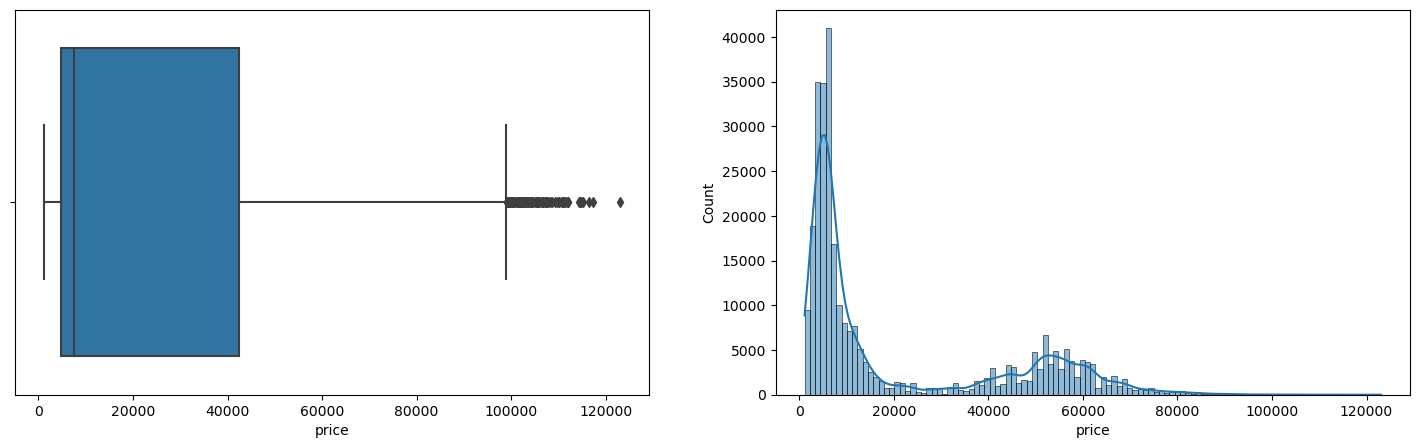

In [20]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)

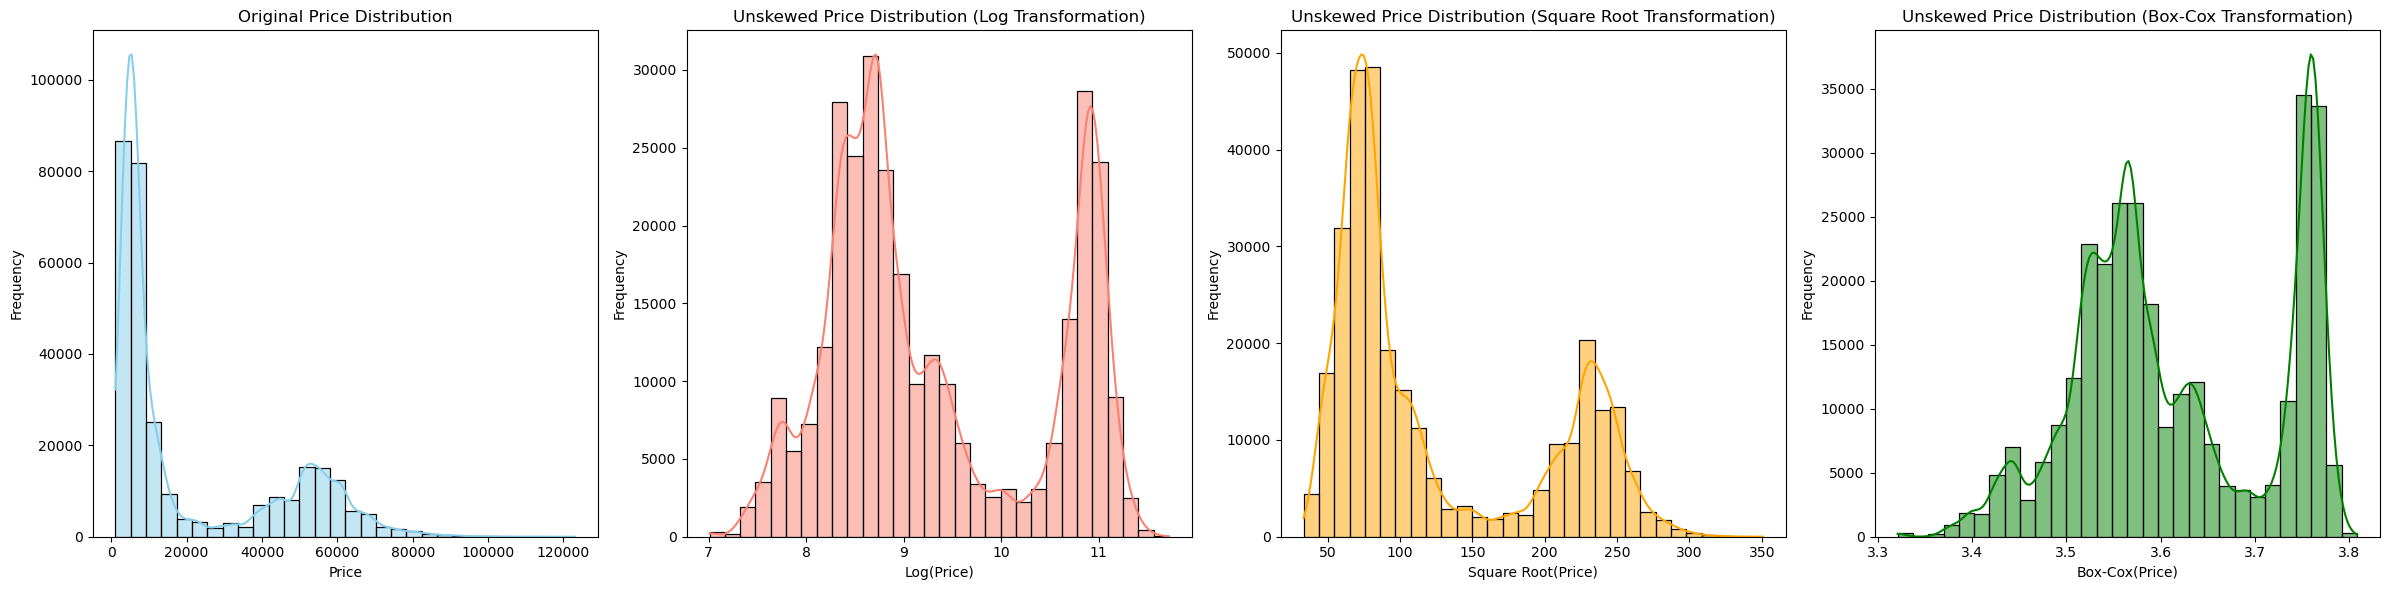

In [21]:
data['price_unskewed_boxcox'], _ = boxcox(data['price'])
data['price_unskewed_sqrt'] = np.sqrt(data['price'])
data['price_unskewed'] = np.log(data['price'])

# Visualize the original and transformed distributions
plt.figure(figsize=(24, 6))  # Increase the figure size for better visualization

# Original distribution
plt.subplot(1, 4, 1)  # Adjust the subplot layout to accommodate four plots
sns.histplot(data=data, x='price', kde=True, color='skyblue', bins=30)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Logarithmic transformation
plt.subplot(1, 4, 2)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed', kde=True, color='salmon', bins=30)
plt.title('Unskewed Price Distribution (Log Transformation)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Square root transformation
plt.subplot(1, 4, 3)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_sqrt', kde=True, color='orange', bins=30)
plt.title('Unskewed Price Distribution (Square Root Transformation)')
plt.xlabel('Square Root(Price)')
plt.ylabel('Frequency')

# Box-Cox transformation
plt.subplot(1, 4, 4)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_boxcox', kde=True, color='green', bins=30)
plt.title('Unskewed Price Distribution (Box-Cox Transformation)')
plt.xlabel('Box-Cox(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
data.describe(include='all')


,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
count,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,2.999990e+05,299999.000000,299999.000000,2.999990e+05,299999.000000,299999.000000,299999.000000
mean,2.955153,3.741732,2.577365,12.982760,1.833573,0.924673,15.241217,2.584475,2.587989,0.688376,733.460458,26.005763,20897.897916,-2.829035e-02,-0.252139,-0.275697,-5.301239e-03,3.615940,124.717163,9.331101
std,2.003258,3.002821,1.751668,5.362041,1.378340,0.397794,6.047971,1.359204,1.744774,0.463158,431.510760,13.558573,22700.630886,7.882493e-01,0.560617,0.669709,6.895334e-01,0.106667,73.099555,1.112784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1105.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,3.320737,33.241540,7.007601
25%,1.000000,0.000000,1.000000,8.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000,410.000000,15.000000,4783.000000,-8.660254e-01,-0.707107,-0.866025,-7.071068e-01,3.536376,69.159237,8.472823
50%,3.000000,3.000000,2.000000,12.000000,2.000000,1.000000,17.000000,2.000000,3.000000,1.000000,675.000000,26.000000,7425.000000,1.224647e-16,-0.258819,-0.500000,-1.836970e-16,3.587213,86.168440,8.912608
75%,5.000000,7.000000,4.000000,18.000000,3.000000,1.000000,20.000000,4.000000,4.000000,1.000000,970.000000,38.000000,42521.000000,8.660254e-01,0.258819,0.258819,7.071068e-01,3.742152,206.206207,10.657753
max,6.000000,7.000000,5.000000,23.000000,5.000000,2.000000,23.000000,5.000000,5.000000,1.000000,2990.000000,49.000000,123071.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,3.808413,350.814766,11.720517


In [23]:
data.to_csv("Ordinal_Encoding.csv", index = False)

C:\Users\sotir\AppData\Local\Temp\ipykernel_17552\426789158.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


Text(0.5, 1.0, 'Features correlation')

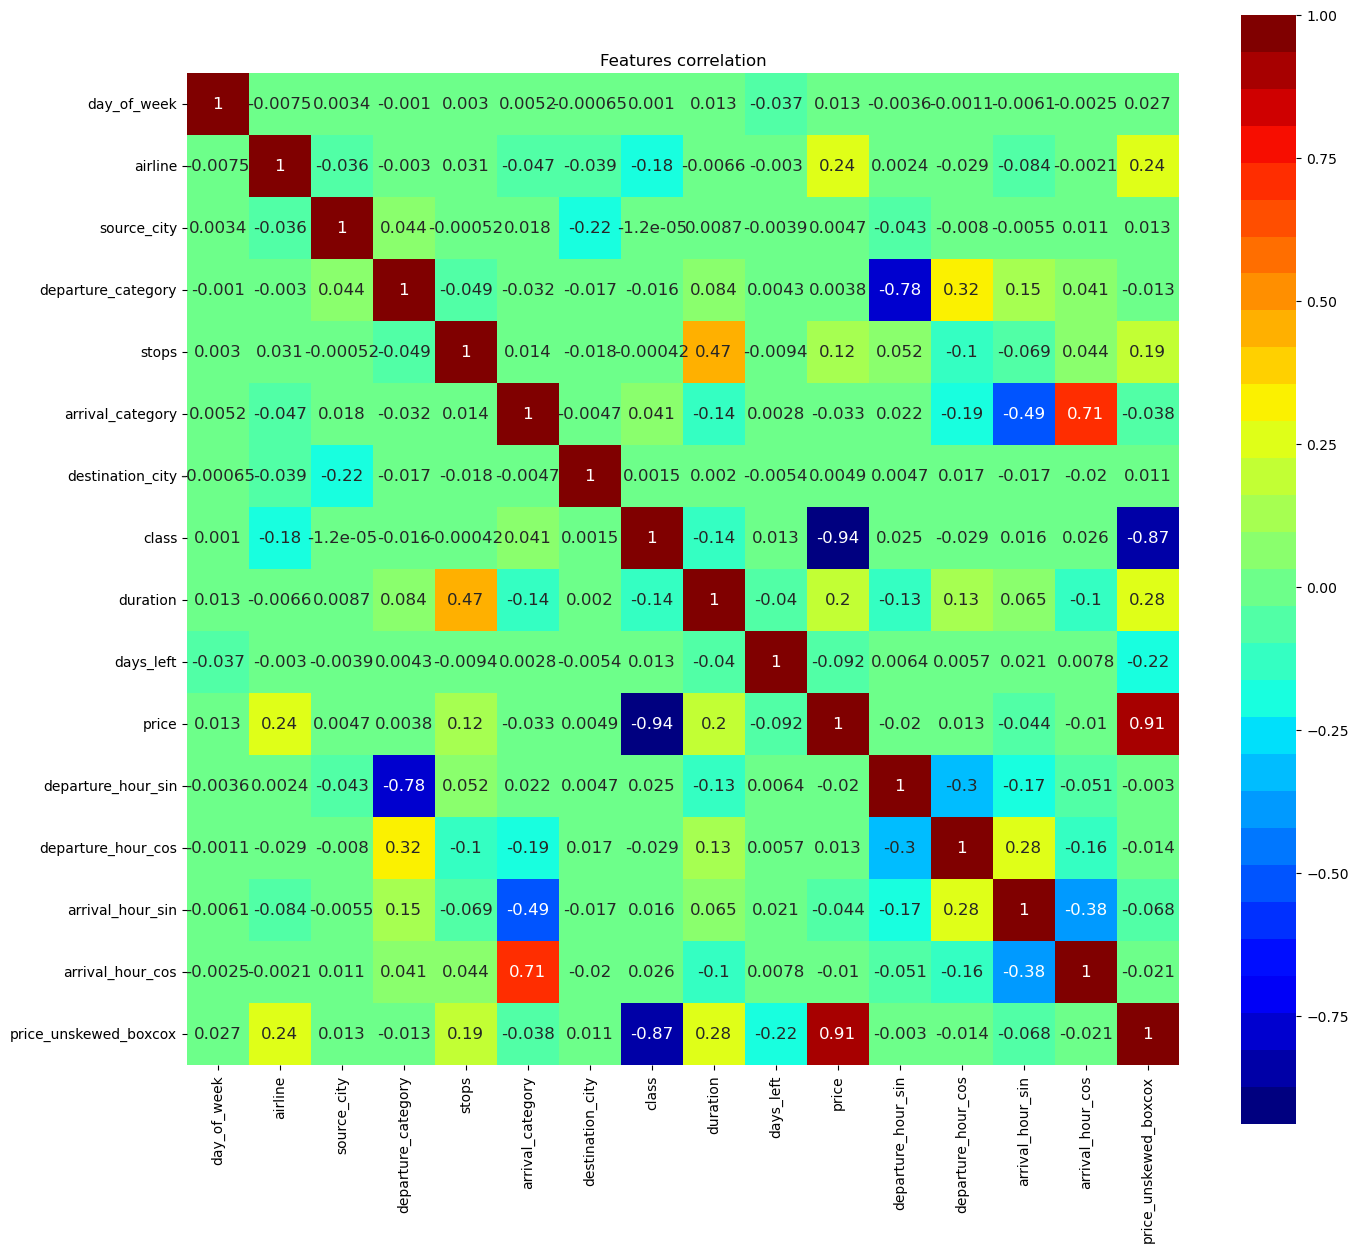

In [33]:
from matplotlib import cm as cm

df = data.select_dtypes(include=['number'])
df.drop(['price_unskewed','price_unskewed_sqrt','arrival_hour','departure_hour'], axis=1, inplace=True)
corr = df.corr(method='pearson')
cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 16 , 16 ) )
sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,
annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns,
yticklabels=corr.columns)
plt.title("Features correlation")